In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataset = pd.read_csv("abalone.csv.xls")

In [4]:
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [5]:
dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

Univariate

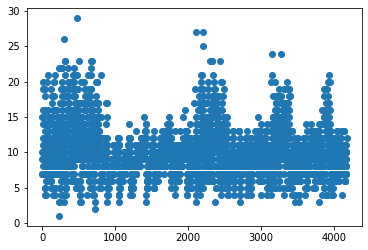

In [6]:

plt.scatter(dataset.index,dataset['Rings'])
plt.show()

#Bivariate Analysis

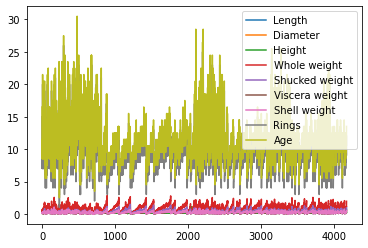

In [7]:

dataset.plot.line()

#Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


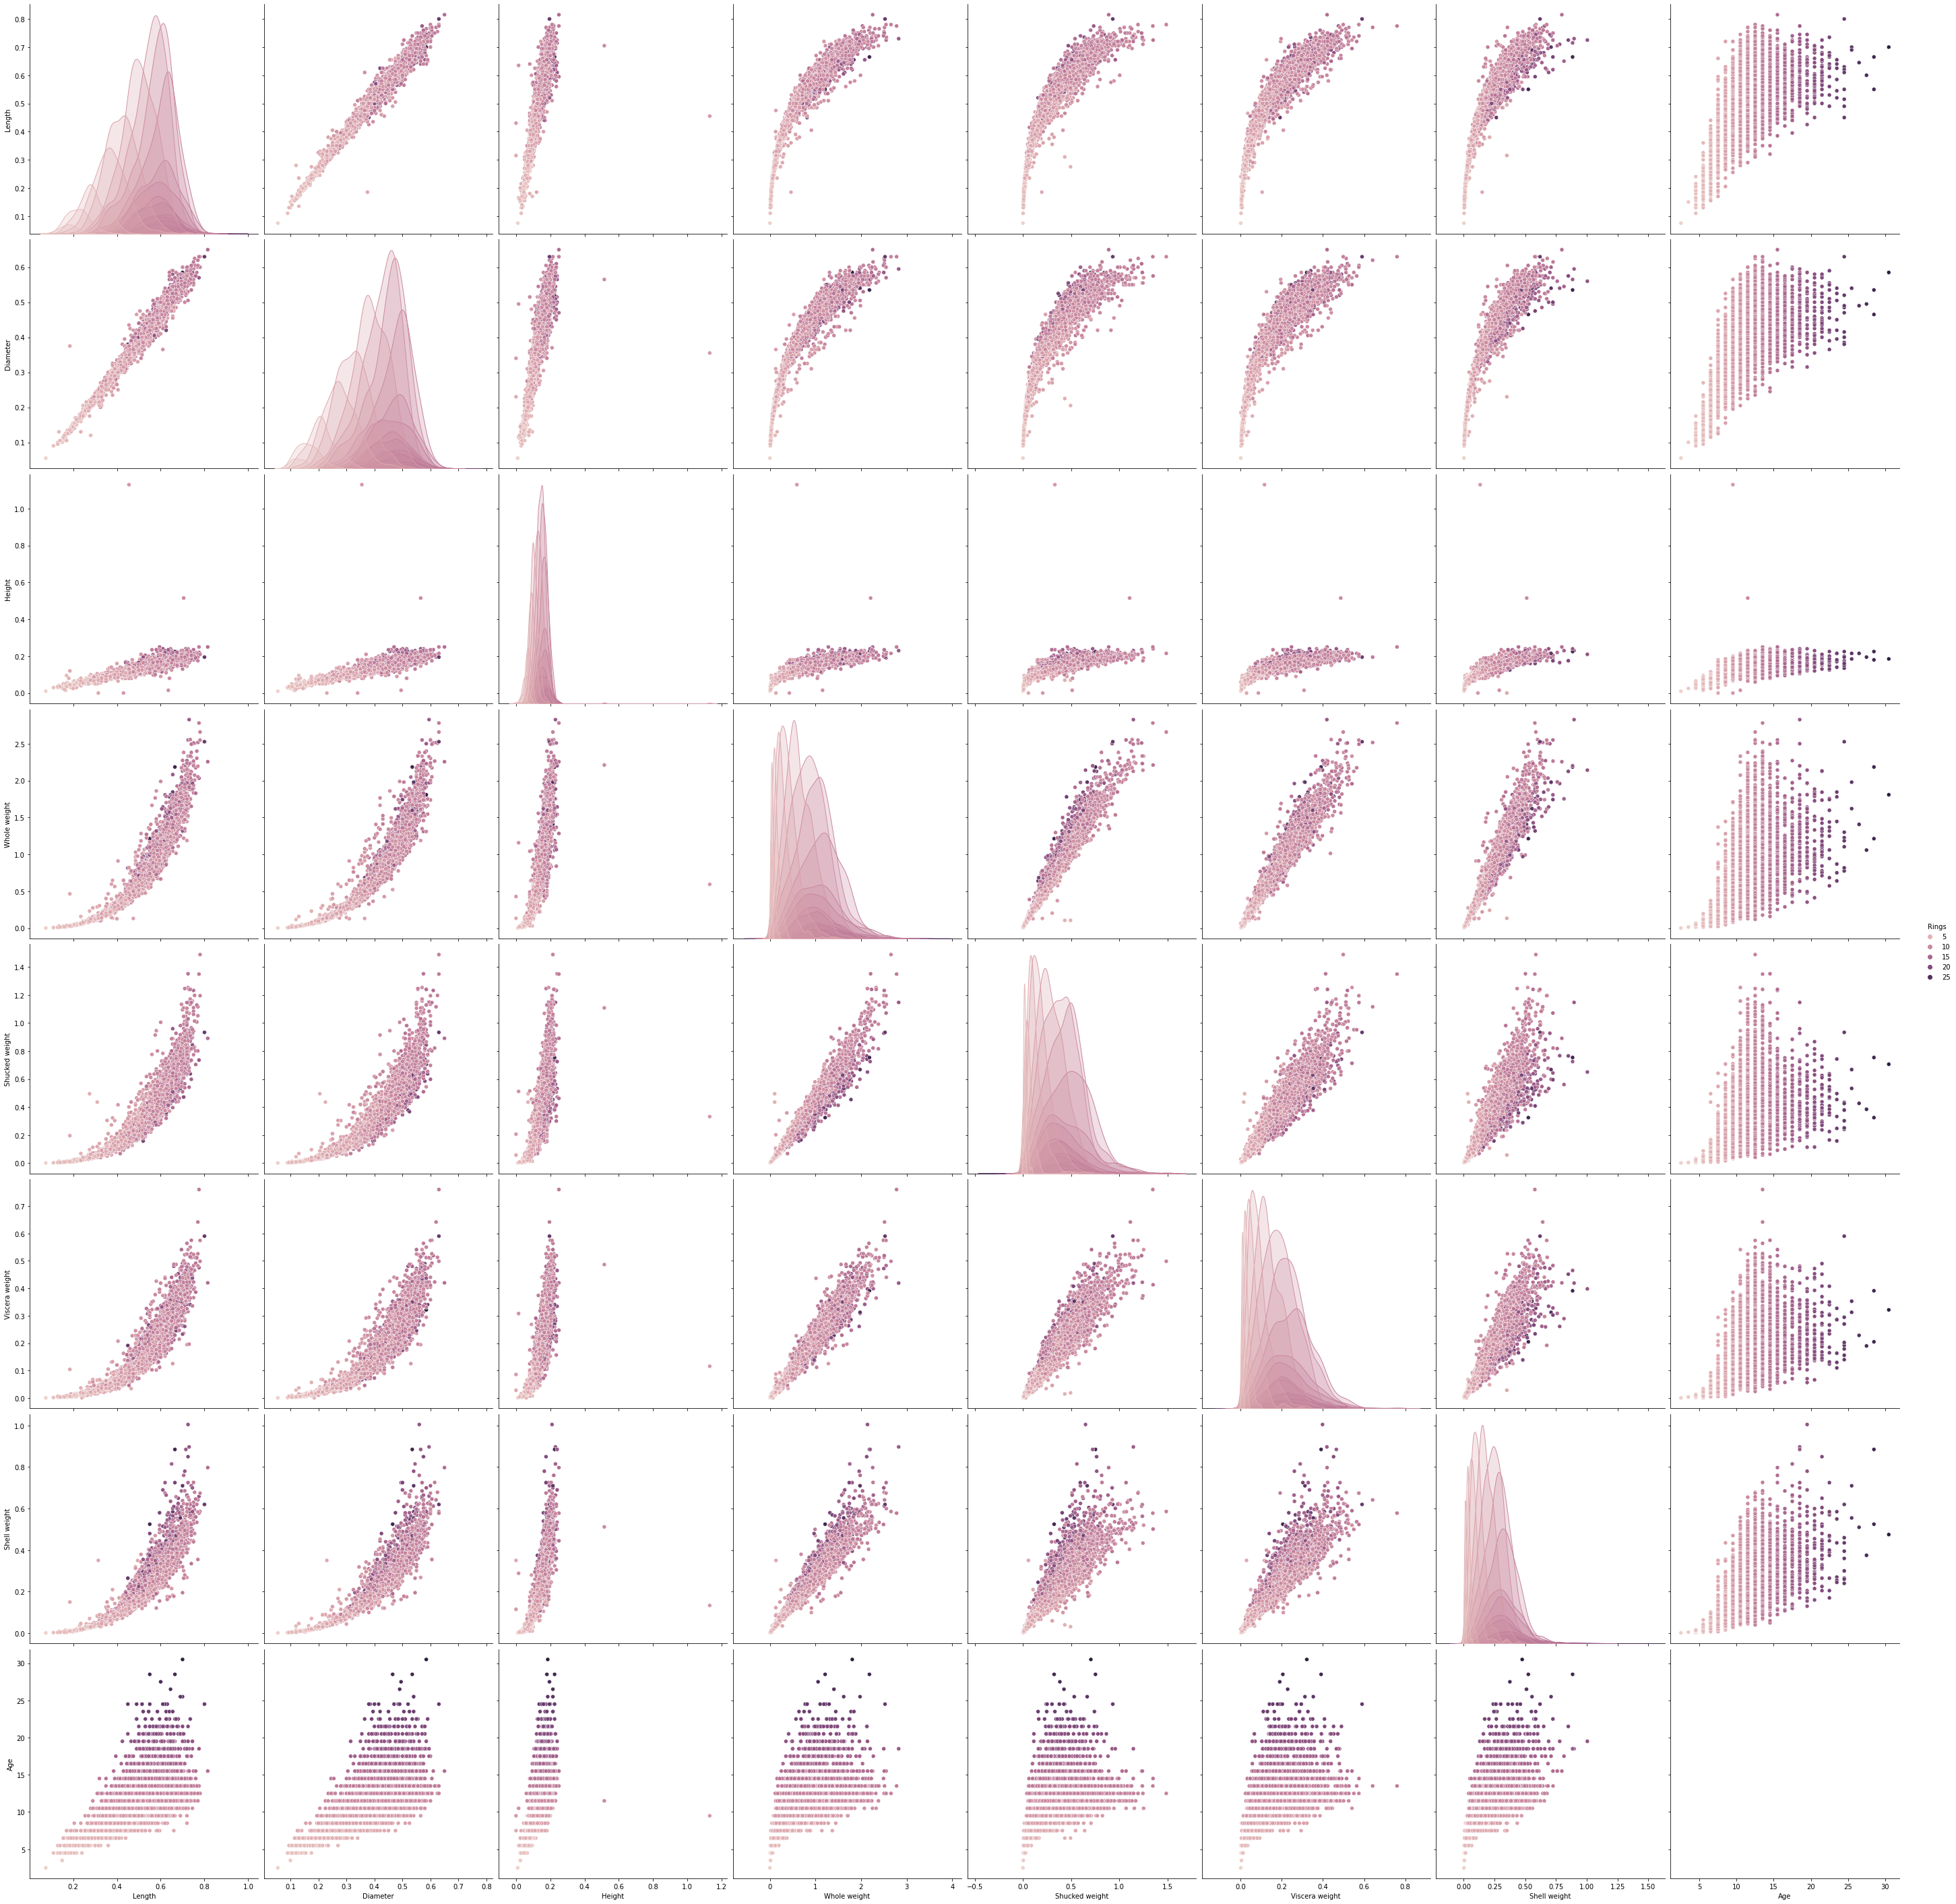

In [8]:

sns.pairplot(dataset,hue="Rings",size=5)

#Perform Descriptive Statistics on dataset

In [9]:


stats = dataset['Age'].describe()
print(stats)

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: Age, dtype: float64


#Handle Missing Values

In [10]:

dataset.shape

(4177, 10)

In [11]:
dataset.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

#Find the outliers and replace outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


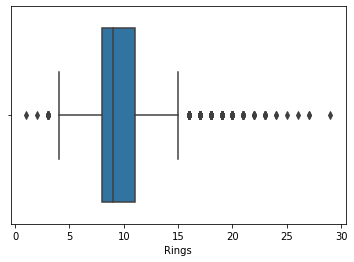

In [13]:

import seaborn as sns
sns.boxplot(dataset['Rings'],data=dataset)

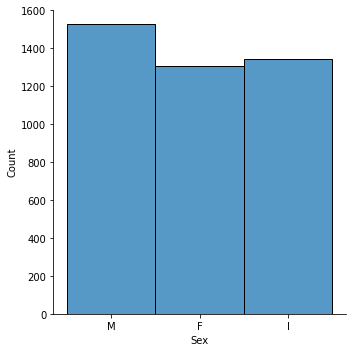

In [14]:
sns.displot(dataset['Sex'])

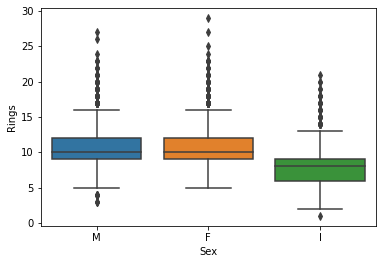

In [15]:
sns.boxplot(x='Sex',y='Rings' ,data=dataset)

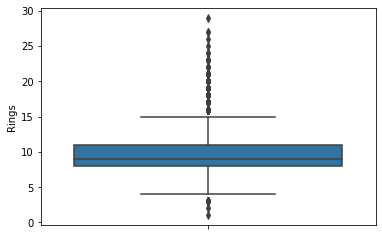

In [16]:
sns.boxplot(y='Rings' ,data=dataset)

#Categorical columns and perform encoding

In [17]:

dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

#Categorical columns and perform encoding

In [18]:

pd.get_dummies(dataset, columns=["Age"]).head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_2.5,...,Age_20.5,Age_21.5,Age_22.5,Age_23.5,Age_24.5,Age_25.5,Age_26.5,Age_27.5,Age_28.5,Age_30.5
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,...,0,0,0,0,0,0,0,0,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,...,0,0,0,0,0,0,0,0,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,...,0,0,0,0,0,0,0,0,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,...,0,0,0,0,0,0,0,0,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data_tips=pd.get_dummies(dataset)
data_tips

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


#Categorical columns and perform encoding

In [20]:

pd.get_dummies(dataset, columns=["Sex"]).head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


#Split data into independent and dependent variables

In [21]:

X = dataset.iloc[:, :-1].values
print(X)

[['M' 0.455 0.365 ... 0.101 0.15 15]
 ['M' 0.35 0.265 ... 0.0485 0.07 7]
 ['F' 0.53 0.42 ... 0.1415 0.21 9]
 ...
 ['M' 0.6 0.475 ... 0.2875 0.308 9]
 ['F' 0.625 0.485 ... 0.261 0.296 10]
 ['M' 0.71 0.555 ... 0.3765 0.495 12]]


#dependent variable

In [22]:

Y = dataset.iloc[:, -1].values
print(Y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


#Scaling Independent Variables

In [23]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[["Rings"]] = scaler.fit_transform(dataset[["Age"]])
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.500000,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.214286,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.285714,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.321429,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.214286,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.357143,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.321429,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.285714,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.321429,11.5


#split The data into training and testing 

In [24]:


from sklearn.model_selection import train_test_split
y1 = dataset.Length
x1 = dataset.drop('Length',axis=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
print(x1_test.shape)
print(x1_train.shape)
print(y1_test.shape)
print(y1_train.shape)

(836, 9)
(3341, 9)
(836,)
(3341,)


#Build the Model

In [25]:


dataset.columns
dataset = dataset.dropna(axis=0)
y= dataset.Rings
melbourne_features = ['Rings', 'Height', 'Diameter', 'Shell weight', 'Length']
X= dataset[melbourne_features]
X.describe()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state=2)
melbourne_model.fit(X, y)
print(X.head())
print(melbourne_model.predict(X.head()))


      Rings  Height  Diameter  Shell weight  Length
0  0.500000   0.095     0.365         0.150   0.455
1  0.214286   0.090     0.265         0.070   0.350
2  0.285714   0.135     0.420         0.210   0.530
3  0.321429   0.125     0.365         0.155   0.440
4  0.214286   0.080     0.255         0.055   0.330
[0.5        0.21428571 0.28571429 0.32142857 0.21428571]


#Train and Test the Model

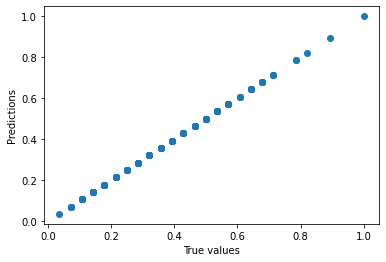

In [26]:

from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()
